<a href="https://colab.research.google.com/github/gomlfx/machineLearningForex/blob/master/ytcsbspp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [0]:
import pandas as pd
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [20]:
#get the data
df = pd.read_csv("https://raw.githubusercontent.com/gomlfx/machineLearningForex/master/EURUSD60.csv")
df.tail()

,day,close
12227,20191011,1.10349
12228,20191014,1.10259
12229,20191015,1.10316
12230,20191016,1.10718
12231,20191017,1.11242


In [21]:
df = df[['close']]
df.head()

,close
0,0.5369
1,0.5366
2,0.5365
3,0.5368
4,0.5371


In [4]:
forecast_out = 30
#create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['close']].shift(-forecast_out)
print(df.tail())

         close  Prediction
12227  1.10349         NaN
12228  1.10259         NaN
12229  1.10316         NaN
12230  1.10718         NaN
12231  1.11242         NaN


In [5]:
#create independent x
x = np.array(df.drop(['Prediction'],1))
#remove last n rows
x = x[:-forecast_out]
print(x)


[[0.5369 ]
 [0.5366 ]
 [0.5365 ]
 ...
 [1.09733]
 [1.10348]
 [1.1034 ]]


In [6]:
#convert df to np array
y = np.array(df['Prediction'])
#get all y values except last n rows
y = y[:-forecast_out]
print(y)

[0.5387  0.5384  0.5385  ... 1.10316 1.10718 1.11242]


In [0]:
#split data into 80/20 train/test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [0]:
#make/train model svm

In [9]:
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
#test model 
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence:", svm_confidence)

svm confidence: 0.9689449891670349


In [0]:
#make/train linear regression

In [12]:
lr = LinearRegression()
#train model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence:", lr_confidence)

lr confidence: 0.9696746266501455


In [0]:
#make/train lgbm
from lightgbm import LGBMRegressor 

In [15]:
lgbm = LGBMRegressor()
#train the model
lgbm.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
lgbm_confidence = lgbm.score(x_test, y_test)
print("lgbm confidence: ", lgbm_confidence)

lgbm confidence:  0.9704160030588524


In [17]:
#set x_forecast equal to the last 30 rows of the original data set from close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1.10245]
 [1.10477]
 [1.10432]
 [1.10102]
 [1.10643]
 [1.10697]
 [1.10003]
 [1.10725]
 [1.10299]
 [1.10408]
 [1.10187]
 [1.09925]
 [1.10197]
 [1.09418]
 [1.09198]
 [1.09409]
 [1.0898 ]
 [1.0933 ]
 [1.09587]
 [1.09626]
 [1.09768]
 [1.09701]
 [1.09553]
 [1.09707]
 [1.10053]
 [1.10349]
 [1.10259]
 [1.10316]
 [1.10718]
 [1.11242]]


In [18]:
#print the predictions for the next n days
lgbm_prediction = lgbm.predict(x_forecast)
print(lgbm_prediction)

[1.11000494 1.10828895 1.10828895 1.10211565 1.11453556 1.11453556
 1.10211565 1.11453556 1.11000494 1.10828895 1.11000494 1.10242767
 1.11000494 1.10729998 1.10936014 1.10729998 1.09881951 1.10936014
 1.10729998 1.10729998 1.10268791 1.10268791 1.10729998 1.10268791
 1.10211565 1.11000494 1.11000494 1.11000494 1.11453556 1.10710505]


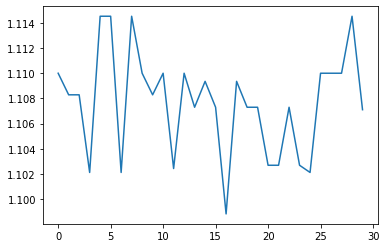

In [19]:
import matplotlib.pyplot as plt
plt.plot(lgbm_prediction)
plt.show()